<a href="https://colab.research.google.com/github/nataliashalaeva/ml/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('Customers.csv', sep = ',')

0. Провести предварительный анализ данных

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df = pd.get_dummies(df, drop_first=True)

1. Используя метод локтя или силуэтный метод определить оптимальное количество
кластеров для K-means или другого алгоритма кластеризации

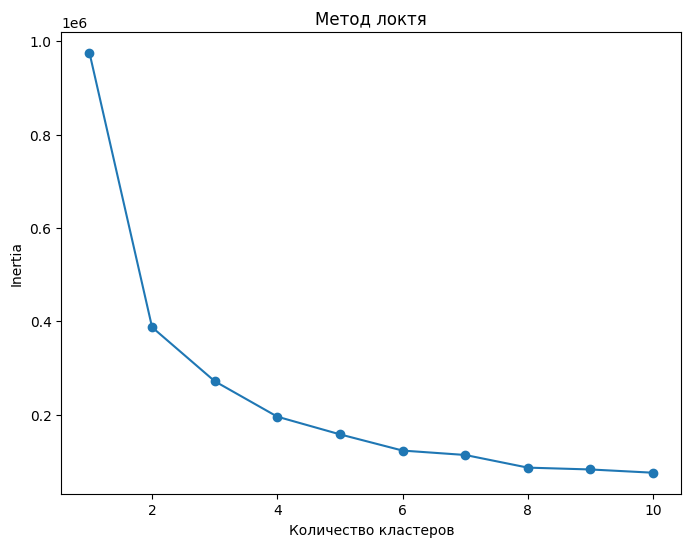

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Подготовим данные для кластеризации (без целевых переменных и категориальных признаков)
X = df.values

# Рассчитаем сумму квадратов расстояний для разных значений K
inertia = []
for k in range(1, 11):  # Тестируем количество кластеров от 1 до 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Построим график
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia")
plt.show()


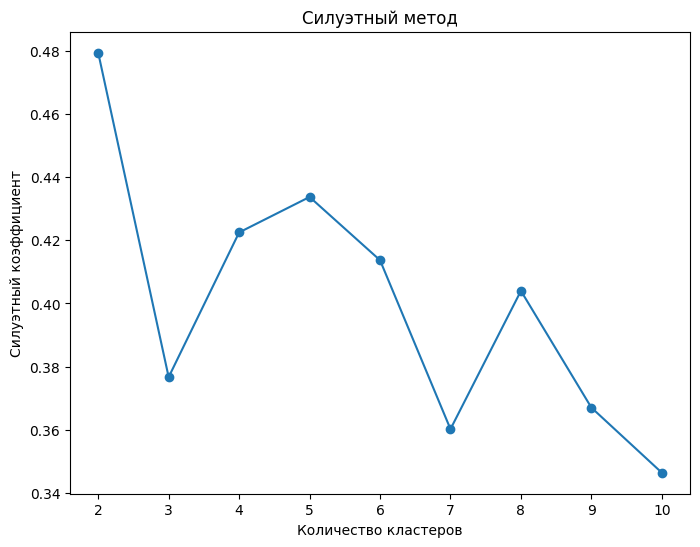

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Построим график
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Силуэтный метод")
plt.xlabel("Количество кластеров")
plt.ylabel("Силуэтный коэффициент")
plt.show()


2. Применить разные алгоритмы кластеризации к подготовленным данным (K-means,
Иерархическая кластеризация, DBSCAN)

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

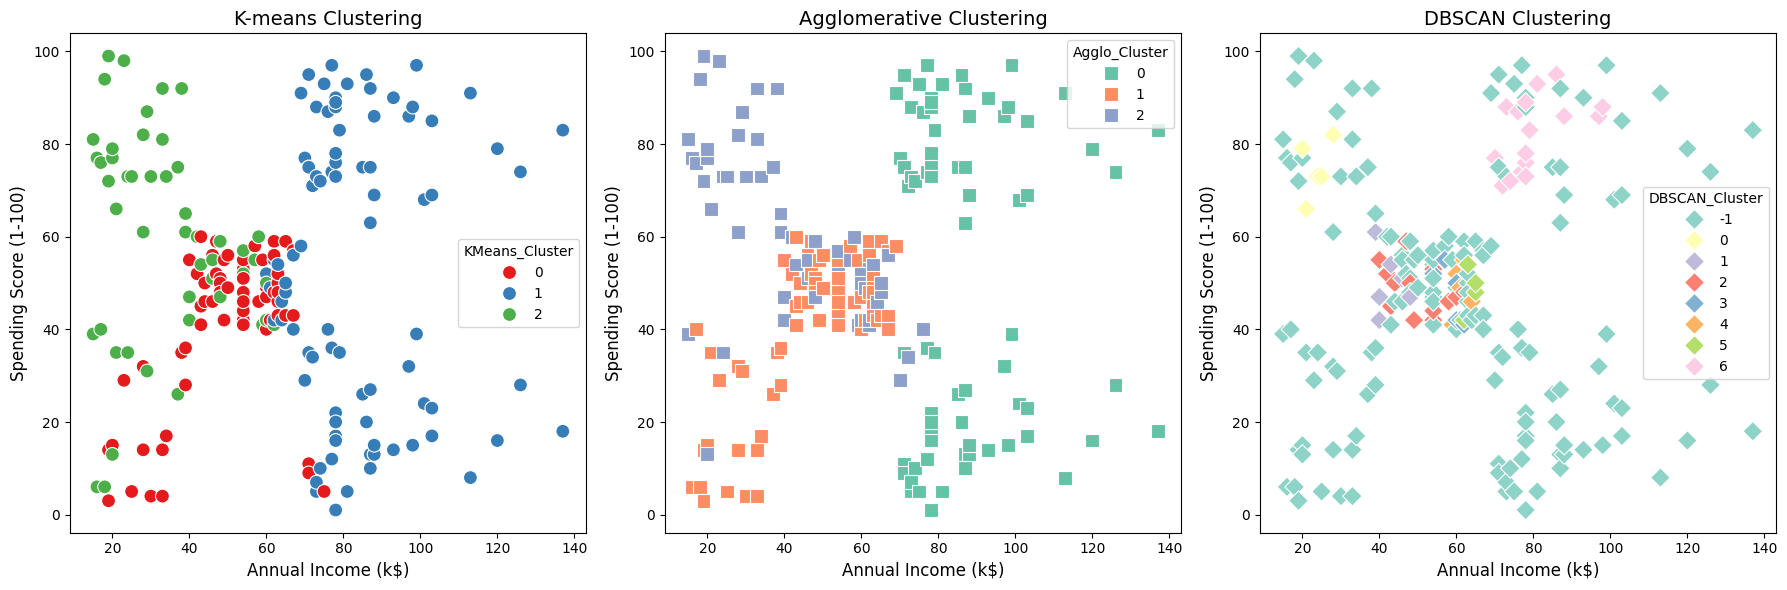

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Иерархическая кластеризация
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Настройка графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Увеличен размер графиков
axes = axes.flatten()

# Визуализация кластеров K-means
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='Set1', ax=axes[0], s=100, marker='o')
axes[0].set_title('K-means Clustering', fontsize=14)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12)

# Визуализация кластеров Иерархической кластеризации
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglo_Cluster', data=df, palette='Set2', ax=axes[1], s=100, marker='s')
axes[1].set_title('Agglomerative Clustering', fontsize=14)
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12)

# Визуализация кластеров DBSCAN
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='Set3', ax=axes[2], s=100, marker='D')
axes[2].set_title('DBSCAN Clustering', fontsize=14)
axes[2].set_xlabel('Annual Income (k$)', fontsize=12)
axes[2].set_ylabel('Spending Score (1-100)', fontsize=12)

# Завершаем визуализацию
plt.tight_layout()
plt.show()


3. Проверить различные метрики кластеризации

In [ ]:
from sklearn.metrics import silhouette_score

# Исключаем точки с меткой -1 (шум) для DBSCAN
dbscan_labels_filtered = df['dbscan_labels']
dbscan_labels_filtered = dbscan_labels_filtered[dbscan_labels_filtered != -1]

# Применяем силуэтный коэффициент, игнорируя шумовые точки
if len(set(dbscan_labels_filtered)) > 1:
    dbscan_silhouette = silhouette_score(X, df['dbscan_labels'])
else:
    dbscan_silhouette = -1  # Если все метки одинаковые или только шум, то коэффициент будет отрицательным

# Выводим результаты
print(f"Силуэтный коэффициент K-Means: {kmeans_silhouette}")
print(f"Силуэтный коэффициент Иерархической кластеризации: {hierarchical_silhouette}")
print(f"Силуэтный коэффициент DBSCAN: {dbscan_silhouette}")


Силуэтный коэффициент K-Means: 0.3766801400675223
Силуэтный коэффициент Иерархической кластеризации: 0.33073425793530475
Силуэтный коэффициент DBSCAN: -1


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Функция для оценки качества кластеризации
def evaluate_clustering(X, labels, algorithm_name):
    silhouette = silhouette_score(X, labels)  # Силуэтный коэффициент
    davies_bouldin = davies_bouldin_score(X, labels)  # Индекс Дэвиса-Боулдина
    calinski_harabasz = calinski_harabasz_score(X, labels)  # Индекс Калински-Харабаша

    # Вывод результатов
    print(f"\n{algorithm_name} Clustering Metrics:")
    print(f"Silhouette Score: {silhouette:.3f} ")
    print(f"Davies-Bouldin Index: {davies_bouldin:.3f} ")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f} ")

# Оценка качества кластеризации для каждого алгоритма
evaluate_clustering(X_scaled, df['KMeans_Cluster'], "K-means")
evaluate_clustering(X_scaled, df['Agglo_Cluster'], "Hierarchical")
evaluate_clustering(X_scaled, df['DBSCAN_Cluster'], "DBSCAN")



K-means Clustering Metrics:
Silhouette Score: 0.252 
Davies-Bouldin Index: 1.340 
Calinski-Harabasz Index: 72.915 

Hierarchical Clustering Metrics:
Silhouette Score: 0.236 
Davies-Bouldin Index: 1.445 
Calinski-Harabasz Index: 66.012 

DBSCAN Clustering Metrics:
Silhouette Score: -0.129 
Davies-Bouldin Index: 1.509 
Calinski-Harabasz Index: 6.313 


4. Осуществить визуализацию результатов кластеризации (2D и 3D)

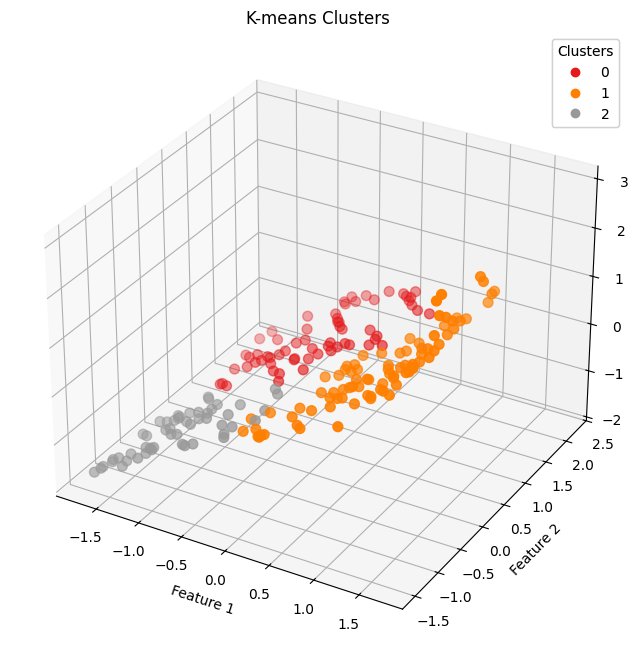

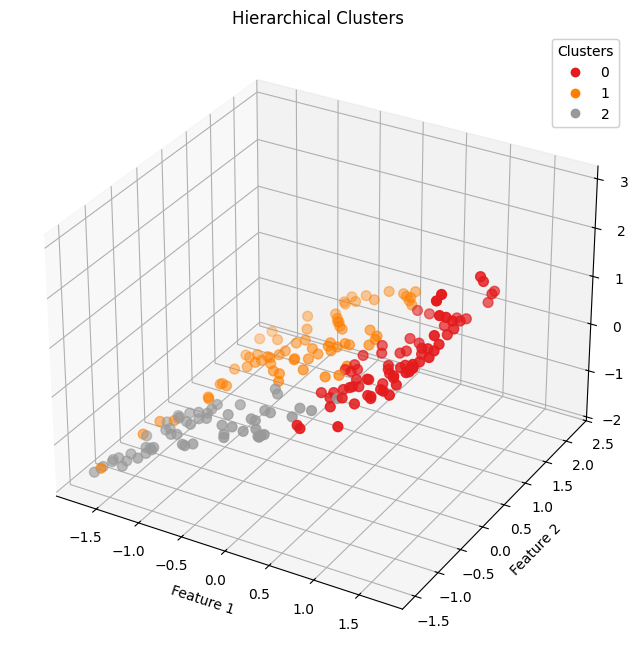

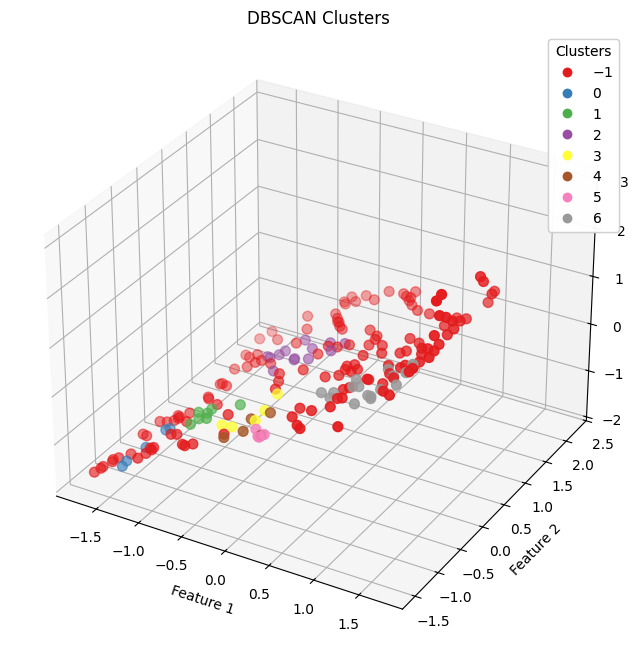

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция для визуализации кластеров в 3D
def plot_3d_clusters(X, labels, algorithm_name):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Площадь для scatter plot с цветами по меткам кластеров
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='Set1', s=50)

    # Добавляем подписи осей
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    # Название графика
    ax.set_title(f"{algorithm_name} Clusters")

    # Добавление легенды
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Показ графика
    plt.show()

# Использование функции для различных алгоритмов
plot_3d_clusters(X_scaled, df['KMeans_Cluster'], 'K-means')
plot_3d_clusters(X_scaled, df['Agglo_Cluster'], 'Hierarchical')
plot_3d_clusters(X_scaled, df['DBSCAN_Cluster'], 'DBSCAN')
